In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e2/sample_submission.csv
/kaggle/input/playground-series-s5e2/train.csv
/kaggle/input/playground-series-s5e2/test.csv
/kaggle/input/playground-series-s5e2/training_extra.csv


In [2]:
df=pd.read_csv('/kaggle/input/playground-series-s5e2/train.csv')
test_df = pd.read_csv("/kaggle/input/playground-series-s5e2/test.csv")

In [3]:
df

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312
...,...,...,...,...,...,...,...,...,...,...,...
299995,299995,Adidas,Leather,Small,9.0,No,No,Tote,Blue,12.730812,129.99749
299996,299996,Jansport,Leather,Large,6.0,No,Yes,Tote,Blue,26.633182,19.85819
299997,299997,Puma,Canvas,Large,9.0,Yes,Yes,Backpack,Pink,11.898250,111.41364
299998,299998,Adidas,Nylon,Small,1.0,No,Yes,Tote,Pink,6.175738,115.89080


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


In [5]:
df.isnull().sum()

id                         0
Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64

In [6]:
df.value_counts('Brand')

Brand
Adidas          60077
Under Armour    59992
Nike            57336
Puma            56814
Jansport        56076
Name: count, dtype: int64

In [7]:

df['Brand'] = df.Brand.fillna('Adidas')
test_df['Brand'] = test_df.Brand.fillna('Adidas')


In [8]:
df.isnull().sum()


id                         0
Brand                      0
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64

In [9]:
df['Brand'].value_counts()


Brand
Adidas          69782
Under Armour    59992
Nike            57336
Puma            56814
Jansport        56076
Name: count, dtype: int64

<Axes: xlabel='Brand'>

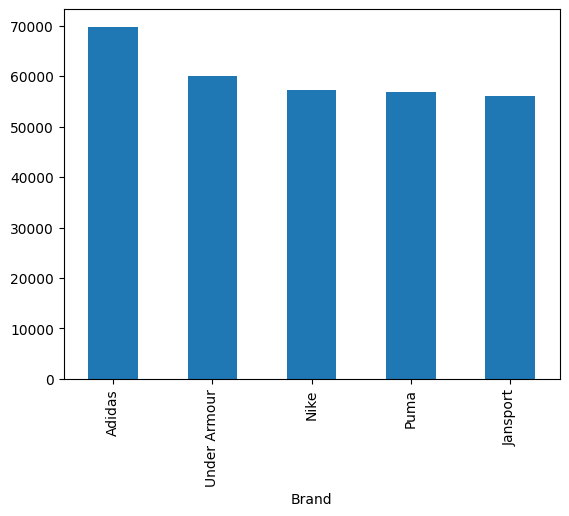

In [10]:
p= df['Brand'].value_counts()
p.plot(kind
       ="bar")

In [11]:
df['Material'].value_counts()
test_df['Material'].value_counts()

Material
Polyester    53027
Leather      48989
Nylon        47493
Canvas       44878
Name: count, dtype: int64

In [12]:
df['Material'] = df['Material'].fillna('Polyester')
test_df['Material'] = test_df['Material'].fillna('Polyester')

In [13]:
df['Material'].isnull().sum()


0

Material
Polyester    87977
Leather      73416
Nylon        70603
Canvas       68004
Name: count, dtype: int64
 
Null Values
0
 
-----------
 


<Axes: xlabel='Material'>

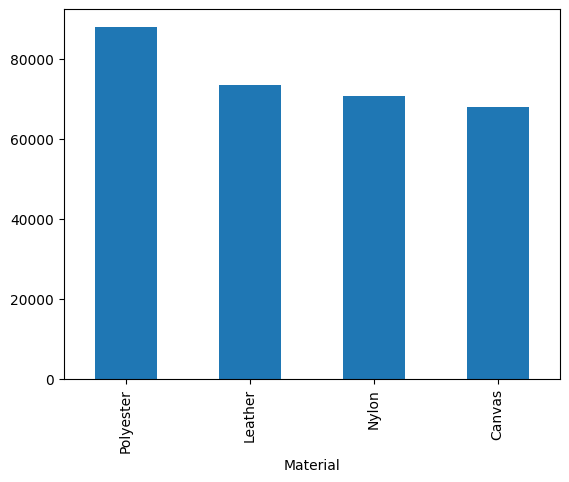

In [14]:
print(df['Material'].value_counts())
print(" ")
print("Null Values")
print(df['Material'].isnull().sum())
print(" ")
print("-----------")
print(" ")
p = df['Material'].value_counts()
p.plot(kind="bar")

In [15]:
print(df['Size'].value_counts())
print(" ")
print("Null Values")
print(" ")
print(df['Size'].isnull().sum())



Size
Medium    101906
Large      98643
Small      92856
Name: count, dtype: int64
 
Null Values
 
6595


In [16]:
df['Size'] = df['Size'].fillna('Medium')
test_df['Size'] = test_df['Size'].fillna('Medium')


Size
Medium    108501
Large      98643
Small      92856
Name: count, dtype: int64
 
Null Values
0
 
-----------
 


<Axes: xlabel='Size'>

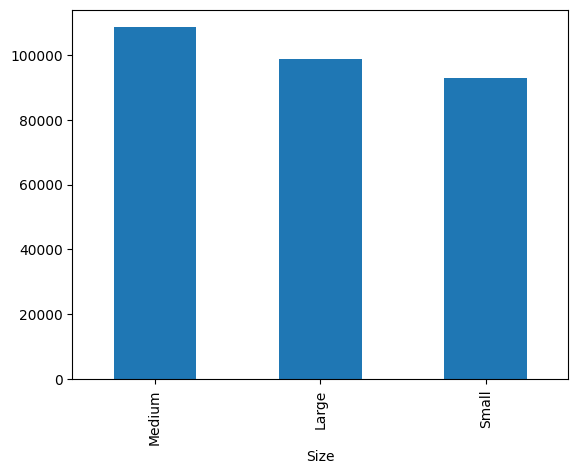

In [17]:
print(df['Size'].value_counts())
print(" ")
print("Null Values")
print(df['Size'].isnull().sum())
print(" ")
print("-----------")
print(" ")
p = df['Size'].value_counts()
p.plot(kind="bar")

In [18]:
print(df['Compartments'].value_counts())
print(" ")
print("Null values")
print(df['Compartments'].isnull().sum())

Compartments
1.0     31568
4.0     31498
2.0     30595
3.0     30293
7.0     30158
9.0     29965
5.0     29959
10.0    29815
8.0     28909
6.0     27240
Name: count, dtype: int64
 
Null values
0


In [19]:
print(df['Laptop Compartment'].value_counts())
print(" ")
print("Null values")
print(df['Laptop Compartment'].isnull().sum())

Laptop Compartment
Yes    148342
No     144214
Name: count, dtype: int64
 
Null values
7444


In [20]:
df['Laptop Compartment'] = df['Laptop Compartment'].fillna('Yes')
test_df['Laptop Compartment'] = test_df['Laptop Compartment'].fillna('Yes')

Laptop Compartment
Yes    155786
No     144214
Name: count, dtype: int64
 
Null Values
0
 
-----------
 


<Axes: xlabel='Laptop Compartment'>

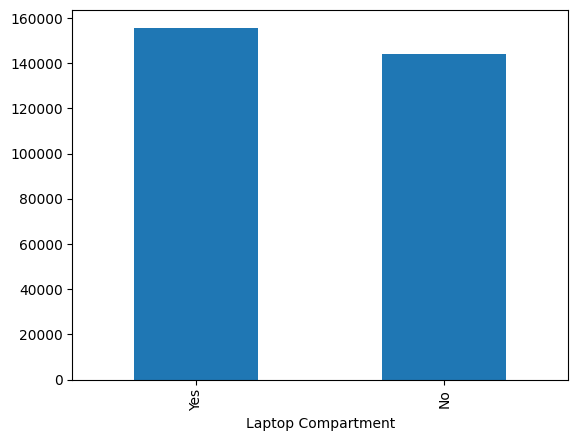

In [21]:
print(df['Laptop Compartment'].value_counts())
print(" ")
print("Null Values")
print(df['Laptop Compartment'].isnull().sum())
print(" ")
print("-----------")
print(" ")
p = df['Laptop Compartment'].value_counts()
p.plot(kind="bar")

In [22]:
print(df['Waterproof'].value_counts())
print(" ")
print("Null Values")
print(" ")
print(df['Waterproof'].isnull().sum())

Waterproof
Yes    148077
No     144873
Name: count, dtype: int64
 
Null Values
 
7050


In [23]:
df['Waterproof'] = df['Waterproof'].fillna('Yes')
test_df['Waterproof'] = test_df['Waterproof'].fillna('Yes')

Waterproof
Yes    155127
No     144873
Name: count, dtype: int64
 
Null Values
0
 
-----------
 


<Axes: xlabel='Waterproof'>

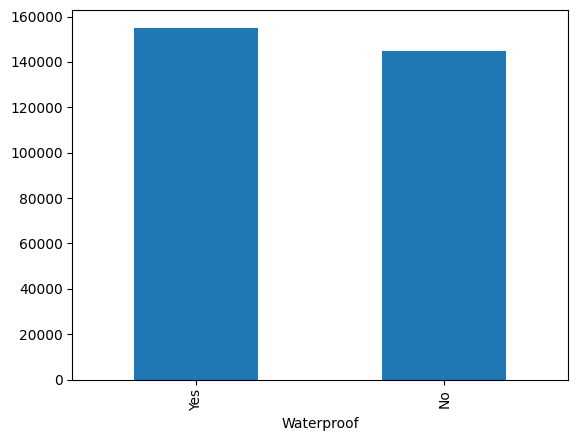

In [24]:
print(df['Waterproof'].value_counts())
print(" ")
print("Null Values")
print(df['Waterproof'].isnull().sum())
print(" ")
print("-----------")
print(" ")
p = df['Waterproof'].value_counts()
p.plot(kind="bar")

In [25]:
print(df['Style'].value_counts())
print(" ")
print("Null Values")
print(" ")
print(df['Style'].isnull().sum())

Style
Messenger    100031
Tote          97438
Backpack      94561
Name: count, dtype: int64
 
Null Values
 
7970


In [26]:
df['Style'] = df['Style'].fillna('Messenger')
test_df['Style'] = test_df['Style'].fillna('Messenger')

Style
Messenger    108001
Tote          97438
Backpack      94561
Name: count, dtype: int64
 
Null Values
0
 
-----------
 


<Axes: xlabel='Style'>

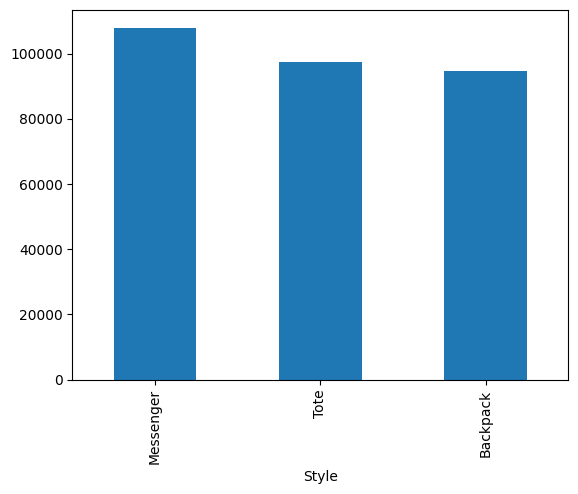

In [27]:
print(df['Style'].value_counts())
print(" ")
print("Null Values")
print(df['Style'].isnull().sum())
print(" ")
print("-----------")
print(" ")
p = df['Style'].value_counts()
p.plot(kind="bar")

In [28]:
print(df['Color'].value_counts())
print(" ")
print("Null Values")
print(" ")
print(df['Color'].isnull().sum())

Color
Pink     51690
Gray     50280
Blue     48097
Red      47219
Green    46386
Black    46378
Name: count, dtype: int64
 
Null Values
 
9950


In [29]:
df['Color'] = df['Color'].fillna('Black')
test_df['Color'] = test_df['Color'].fillna('Black')

Color
Black    56328
Pink     51690
Gray     50280
Blue     48097
Red      47219
Green    46386
Name: count, dtype: int64
 
Null Values
0
 
-----------
 


<Axes: xlabel='Color'>

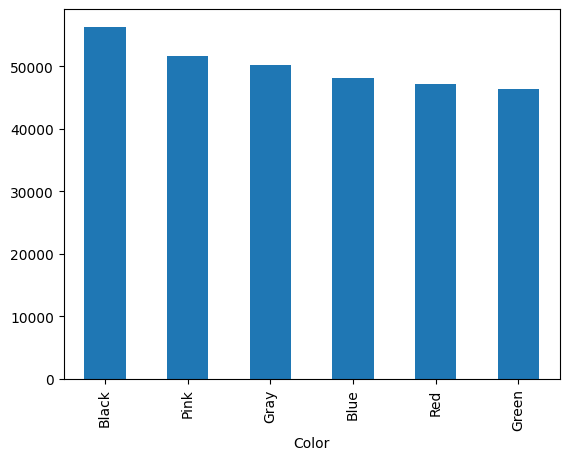

In [30]:
print(df['Color'].value_counts())
print(" ")
print("Null Values")
print(df['Color'].isnull().sum())
print(" ")
print("-----------")
print(" ")
p = df['Color'].value_counts()
p.plot(kind="bar")

In [31]:
print(df['Weight Capacity (kg)'].value_counts())
print(" ")
print("Null Values")
print(" ")
print(df['Weight Capacity (kg)'].isnull().sum())

Weight Capacity (kg)
5.000000     4286
30.000000     185
11.898250     123
22.898382     116
14.908437     101
             ... 
6.938551        1
8.093085        1
22.013824       1
13.246538       1
6.175738        1
Name: count, Length: 181596, dtype: int64
 
Null Values
 
138


In [32]:
df['Weight Capacity (kg)'] = df['Weight Capacity (kg)'].fillna(df['Weight Capacity (kg)'].median())
test_df['Weight Capacity (kg)'] = test_df['Weight Capacity (kg)'].fillna(test_df['Weight Capacity (kg)'].median())

In [33]:
print(df['Weight Capacity (kg)'].value_counts())
print(" ")
print("Null Values")
print(df['Weight Capacity (kg)'].isnull().sum())
print(" ")
print("-----------")
print(" ")


Weight Capacity (kg)
5.000000     4286
30.000000     185
18.068614     148
11.898250     123
22.898382     116
             ... 
6.938551        1
8.093085        1
22.013824       1
13.246538       1
6.175738        1
Name: count, Length: 181596, dtype: int64
 
Null Values
0
 
-----------
 


In [34]:
print(df['Price'].value_counts())
print(" ")
print("Null Values")
print(" ")
print(df['Price'].isnull().sum())

Price
150.00000    5528
15.00000      693
23.59584       22
17.31514       21
62.36063       21
             ... 
82.31121        1
90.79389        1
111.37389       1
94.99611        1
41.96325        1
Name: count, Length: 48212, dtype: int64
 
Null Values
 
0


In [35]:
df.isnull().sum()

id                      0
Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
Price                   0
dtype: int64

In [36]:
df

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312
...,...,...,...,...,...,...,...,...,...,...,...
299995,299995,Adidas,Leather,Small,9.0,No,No,Tote,Blue,12.730812,129.99749
299996,299996,Jansport,Leather,Large,6.0,No,Yes,Tote,Blue,26.633182,19.85819
299997,299997,Puma,Canvas,Large,9.0,Yes,Yes,Backpack,Pink,11.898250,111.41364
299998,299998,Adidas,Nylon,Small,1.0,No,Yes,Tote,Pink,6.175738,115.89080


In [37]:
df.isnull().sum()

id                      0
Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
Price                   0
dtype: int64

EDA Completed

In [38]:
test_df.isnull().sum()

id                      0
Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
dtype: int64

Preprocessing


In [39]:
df['Price'].sum()

24423332.0491

In [40]:
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [41]:
X = df[['Brand','Material','Size','Compartments','Laptop Compartment','Waterproof','Style','Color','Weight Capacity (kg)']]
Y = df['Price']
P = test_df[['Brand','Material','Size','Compartments','Laptop Compartment','Waterproof','Style','Color','Weight Capacity (kg)']]

In [42]:
categorical_features = ['Brand','Material','Size','Laptop Compartment','Waterproof','Style','Color']
encoder = OneHotEncoder(sparse=False, drop='first')

In [43]:
X_encoded = encoder.fit_transform(X[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [44]:
P_encoded = encoder.fit_transform(P[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [45]:
# Convert to DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)

In [46]:
# Convert to DataFrame
P_encoded_df = pd.DataFrame(P_encoded, columns=encoded_feature_names)

In [47]:
# Drop original categorical columns and add encoded columns
X = X.drop(columns=categorical_features)
X = pd.concat([X, X_encoded_df], axis=1)

In [48]:
# Drop original categorical columns and add encoded columns
P = P.drop(columns=categorical_features)
P = pd.concat([P, P_encoded_df], axis=1)

In [49]:
scaler = StandardScaler()
X[['Compartments','Weight Capacity (kg)']] = scaler.fit_transform(
    X[['Compartments','Weight Capacity (kg)']]
)

In [50]:
scaler = StandardScaler()
P[['Compartments','Weight Capacity (kg)']] = scaler.fit_transform(
    P[['Compartments','Weight Capacity (kg)']]
)

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [52]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [53]:
train_score = model.score(X_train, Y_train)

In [54]:
df

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312
...,...,...,...,...,...,...,...,...,...,...,...
299995,299995,Adidas,Leather,Small,9.0,No,No,Tote,Blue,12.730812,129.99749
299996,299996,Jansport,Leather,Large,6.0,No,Yes,Tote,Blue,26.633182,19.85819
299997,299997,Puma,Canvas,Large,9.0,Yes,Yes,Backpack,Pink,11.898250,111.41364
299998,299998,Adidas,Nylon,Small,1.0,No,Yes,Tote,Pink,6.175738,115.89080


In [55]:
train_score = model.score(X_train, Y_train)
print(train_score)

0.0010451898329554288


In [56]:
test_df.isnull().sum()

id                      0
Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
dtype: int64

In [57]:
P.isnull().sum()

Compartments              0
Weight Capacity (kg)      0
Brand_Jansport            0
Brand_Nike                0
Brand_Puma                0
Brand_Under Armour        0
Material_Leather          0
Material_Nylon            0
Material_Polyester        0
Size_Medium               0
Size_Small                0
Laptop Compartment_Yes    0
Waterproof_Yes            0
Style_Messenger           0
Style_Tote                0
Color_Blue                0
Color_Gray                0
Color_Green               0
Color_Pink                0
Color_Red                 0
dtype: int64

In [58]:
predictions = model.predict(P)

In [59]:
submission_df = pd.DataFrame({
    'id': test_df['id'],  # Assuming 'id' exists in test_df
    'Price': predictions
})

In [60]:
test_df['id'] = range(300000, 300000 + len(test_df))

In [61]:
submission_df.to_csv('submission.csv', index=False)